<a href="https://colab.research.google.com/github/AbidYousuf/Abid-Yousuf/blob/main/KNNML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
selected_columns = df.iloc[:, 1:]
first_column = df.iloc[:, 0]


In [ ]:
print(selected_columns)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(first_column)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=40)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.27518675, -0.13800586, -0.24864481, ...,  1.44737061,
         1.61104623,  2.01475765],
       [-0.12383799, -0.3877077 , -0.17484612, ..., -0.36762867,
        -0.62267065, -0.81441175],
       [-0.97767346,  0.28550804, -0.93190456, ..., -0.44097906,
        -0.48205316,  0.20537789],
       ...,
       [-0.12098236,  0.39322256, -0.07368387, ...,  0.62929079,
         0.47317598,  1.85074783],
       [ 1.54099838,  3.24276118,  1.49350172, ...,  0.73539512,
        -0.30749352, -0.45827614],
       [-0.00675688, -1.55298295, -0.08073206, ..., -0.85770769,
        -1.2982811 , -0.74236458]])

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9912280701754386

In [ ]:
scores = []
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))

In [ ]:
import matplotlib.pyplot as plt

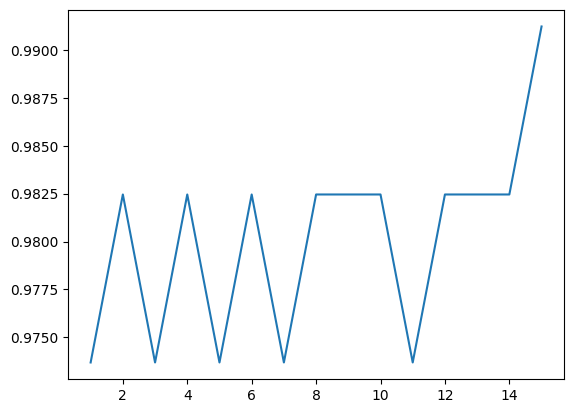

In [ ]:
plt.plot(range(1,16),scores)

In [ ]:
ds = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
ds.shape

(400, 5)

In [ ]:
X = ds.iloc[:,2:4]

In [ ]:
X=X.values

In [ ]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
y = ds.iloc[:,4].values

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
x_train

array([[-0.18630843, -0.58558652],
       [-0.28215842,  1.07855156],
       [ 0.10124156,  1.48024007],
       [-0.7614084 , -1.53242371],
       [-0.56970841,  0.44732677],
       [-0.28215842, -0.3273582 ],
       [-0.28215842,  0.13171438],
       [ 0.77219152, -1.21681131],
       [ 0.38879154,  0.27517456],
       [-0.18630843, -0.21259005],
       [ 1.63484148,  1.70977635],
       [-0.7614084 , -1.58980778],
       [-0.28215842, -1.4463476 ],
       [-0.47385841,  2.25492504],
       [-1.14480838, -1.01596706],
       [ 0.67634153, -0.7290467 ],
       [-0.56970841,  1.42285599],
       [-1.62405836,  0.04563827],
       [ 0.67634153, -1.10204317],
       [ 0.96389151,  1.93931264],
       [-1.04895838, -1.4463476 ],
       [-0.6655584 ,  0.16040641],
       [-1.71990835,  0.44732677],
       [ 2.01824146, -0.81512281],
       [ 1.44314149,  0.33255863],
       [ 1.3472915 , -0.92989095],
       [-0.28215842, -0.90119892],
       [ 0.96389151, -1.01596706],
       [-0.95310839,

In [ ]:
x_train.shape[0]

320

In [ ]:
#find value of K by heuristics method
np.sqrt(x_train.shape[0])

17.88854381999832

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9125

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[54,  5],
       [ 2, 19]])

In [ ]:
# find value of k using cross validation method
scores = []
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  scores.append(accuracy_score(y_test,y_pred))

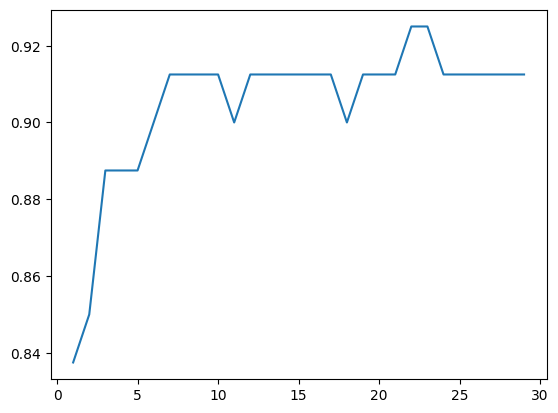

In [ ]:
plt.plot(range(1,30),scores)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.925

In [ ]:
def predict_output():
  age = int(input("Enter your age="))
  salary = int(input("Enter your salary="))
  x_new = np.array([[age],[salary]]).reshape(1,2)
  # print(x_new.shape)
  x_new=sc.transform(x_new)
  if knn.predict(x_new)[0] == 0:
    return "Will not purchase"
  else:
    return "will purchase"
  # return knn.predict(x_new)[0]

In [ ]:
predict_output()

Enter your age=45
Enter your salary=3455555


'will purchase'

In [ ]:
x=np.array([1,2,3])
y=np.array([4,5,6,7])
xx,yy = np.meshgrid(x,y)

yy.shape

(4, 3)

In [ ]:
x=np.linspace(-40,40,100)
y=np.linspace(-50,50,90)

xx,yy = np.meshgrid(x,y)

In [ ]:
z = (xx**2) + (yy**2)

In [ ]:
import random

In [ ]:
z=np.random.random((90,100))

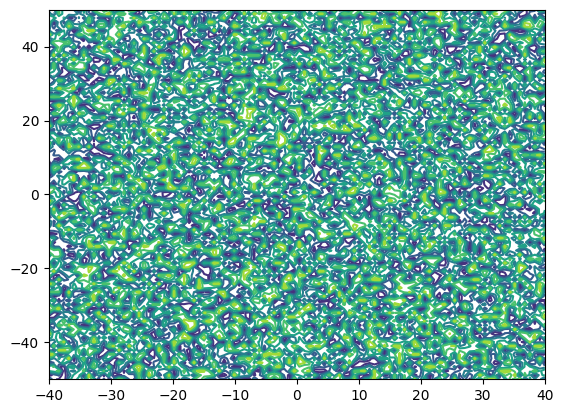

In [ ]:
plt.contour(xx,yy,z)

In [ ]:
a=np.arange(x_train[:,0].min()-1,x_train[:,0].max()+1,0.01)
b=np.arange(x_train[:,1].min()-1,x_train[:,1].max()+1,0.01)
# print(a.shape)
# print(b.shape)

xx,yy = np.meshgrid(a,b)

(603,)
(588,)


In [ ]:
print(xx[0][0])
print(yy[0][0])
knn.predict(np.array([-2.91160834174868,-2.589807778449121]).reshape(1,2))

-2.91160834174868
-2.589807778449121


array([0])

In [ ]:
input = np.array([xx.ravel(),yy.ravel()]).T
label = knn.predict(input)

In [ ]:
l = label.reshape(xx.shape)

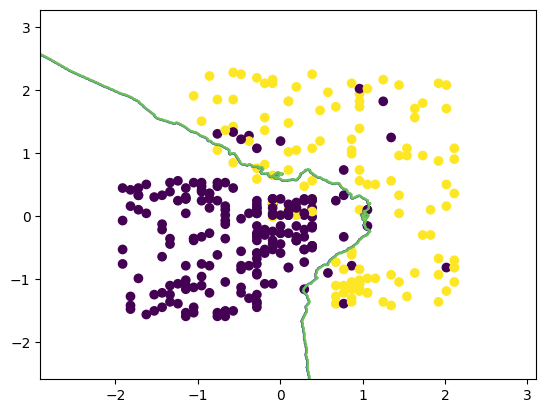

In [ ]:
plt.contour(xx,yy,l,alpha = 0.5)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train)

In [ ]:
m = np.array([[1,2,3],[4,5,6]])
n  = np.array([[7,8,9],[0,0,0]])
input = np.array([m.ravel(),n.ravel()]).T
knn.predict(input)

array([1, 1, 1, 1, 1, 1])

In [ ]:
m

array([[1, 2, 3],
       [4, 5, 6]])

KNN from scratch


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x= df.iloc[:,2:4]
y=df.iloc[:,-1]

In [ ]:
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)


In [ ]:
x_train.shape

(320, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 4.26622465e-01, -1.18318767e-01],
       [-3.44672387e-01, -7.57585164e-01],
       [ 1.10150546e+00, -1.19344862e+00],
       [-1.51848674e-01, -4.96067093e-01],
       [-8.26731669e-01,  1.72256869e-01],
       [-1.21237909e+00, -1.36779400e+00],
       [ 9.08681747e-01, -7.57585164e-01],
       [-2.48260530e-01, -1.36779400e+00],
       [ 1.00509360e+00,  7.82465703e-01],
       [-2.48260530e-01,  2.88487123e-01],
       [-1.50161466e+00, -4.08894402e-01],
       [-1.79085023e+00,  2.69690512e-02],
       [-1.51848674e-01,  1.62513505e+00],
       [ 7.15858034e-01, -1.07721836e+00],
       [ 1.37386895e-01,  1.72256869e-01],
       [-9.23143525e-01,  5.20947631e-01],
       [ 3.30210608e-01,  8.50841782e-02],
       [ 2.33798752e-01,  2.11911363e+00],
       [-5.37496100e-01,  4.91890068e-01],
       [ 8.12269891e-01, -1.19344862e+00],
       [-1.40520281e+00, -1.42590913e+00],
       [-8.26731669e-01, -1.19344862e+00],
       [ 1.39074103e+00,  2.35157413e+00],
       [ 1.

In [ ]:
x_test

array([[2.40e+01, 5.50e+04],
       [5.90e+01, 7.60e+04],
       [4.80e+01, 3.30e+04],
       [2.10e+01, 7.20e+04],
       [6.00e+01, 1.02e+05],
       [4.00e+01, 7.10e+04],
       [4.50e+01, 2.20e+04],
       [3.80e+01, 5.00e+04],
       [4.60e+01, 4.10e+04],
       [1.90e+01, 2.50e+04],
       [2.80e+01, 5.90e+04],
       [3.10e+01, 6.60e+04],
       [2.90e+01, 8.30e+04],
       [2.00e+01, 4.90e+04],
       [5.30e+01, 3.40e+04],
       [4.40e+01, 1.39e+05],
       [3.00e+01, 8.90e+04],
       [6.00e+01, 3.40e+04],
       [3.60e+01, 1.18e+05],
       [3.80e+01, 6.10e+04],
       [4.80e+01, 7.40e+04],
       [5.90e+01, 8.30e+04],
       [4.70e+01, 3.00e+04],
       [4.00e+01, 7.20e+04],
       [5.10e+01, 2.30e+04],
       [2.00e+01, 8.20e+04],
       [2.30e+01, 8.20e+04],
       [5.60e+01, 1.04e+05],
       [3.10e+01, 3.40e+04],
       [3.80e+01, 1.12e+05],
       [3.80e+01, 5.50e+04],
       [4.80e+01, 1.41e+05],
       [2.00e+01, 8.60e+04],
       [4.90e+01, 8.60e+04],
       [3.50e+